<a href="https://colab.research.google.com/github/keyayeten/opt_drill_methods/blob/main/one_dim_opt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Вариант *22*
### Исаев Владислав

In [1]:
import sympy as sp
import seaborn as sns

### Задаем функцию и её график
#### f(x) = arctg(x) - sin(x)

<Axes: >

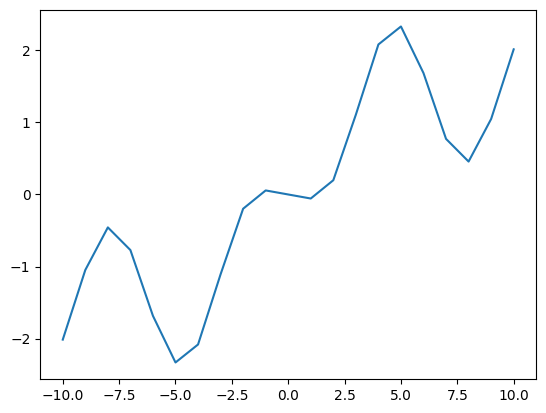

In [2]:
x = sp.Symbol('x')
f = sp.atan(x) - sp.sin(x)
sns.lineplot(x=[i for i in range(-10, 11)], y=[float(f.subs(x, i)) for i in range(-10, 11)])

# Метод дихотомии
Постановка задачи для метода Дихотомии: найти минимум (или максимум) функции f(x) на отрезке [a,b].

Описание алгоритма:

1.   Задается начальный отрезок [a,b] и значение точности eps.
2.   Вычисляется середина отрезка c = (a+b)/2 и значения функции f(a), f(b) и f(c).

3. Если f(c) < f(b), то новый отрезок становится [a, c], иначе - [c, b].
4. Проверяется условие окончания работы алгоритма: |b-a| < eps. Если оно выполнено, то текущее значение c является ответом, иначе переход к шагу 2.

Алгоритм Дихотомии гарантированно сойдется к минимуму (максимуму) функции на заданном отрезке при условии, что функция f(x) унимодальна на этом отрезке (имеет только один экстремум).



In [3]:
function_called = 0


def dichotomy_method(f, a, b, eps):
    """
    Метод дихотомии для поиска минимума функции
    
    :param f: функция
    :param a: левая граница интервала
    :param b: правая граница интервала
    :param eps: точность вычислений
    :return: значение x, при котором функция принимает минимальное значение
    """

    accuracy = eps
    eps *= 0.0001
    iterations = 0
    while abs(b - a) > eps:
        iterations += 1
        # Вычисляем середину отрезка
        c = (a + b) / 2
        
        # Вычисляем значения функции в точках a, b и c
        fa = target_func(a)
        fb = target_func(b)
        fc = target_func(c)
        
        # Определяем в какой половине отрезка находится минимум
        if fc < fb:
            b = c
        else:
            a = c
            
    return {'min': (a + b) / 2,
            'iters': iterations,
            'count': function_called,
            'accuracy': accuracy}


def target_func(sub):
  global function_called
  function_called += 1
  x = sp.Symbol('x')
  f = sp.atan(x) - sp.sin(x)
  return float(f.subs(x, sub))


def info_message(result, f):
  print(f"""
Решение {result['min']}; значение функции {f.subs(x, result['min'])}
Точность {result['accuracy']}
Количество итераций {result['iters']}
Эффективность {1/(2**result['count'])**0.5}
Вызовы целефой функции {result['count']}
  """)


res = dichotomy_method(f, -10, 10, 0.1)
res1 = dichotomy_method(f, -10, 10, 0.01)
res2 = dichotomy_method(f, -10, 10, 0.001)
res3 = dichotomy_method(f, -10, 10, 0.0001)
res4 = dichotomy_method(f, -10, 10, 0.000001)

info_message(res, f)
info_message(res1, f)
info_message(res2, f)
info_message(res3, f)
info_message(res4, f)



Решение -5.000004768371582; значение функции -2.33232387238929
Точность 0.1
Количество итераций 21
Эффективность 3.292722539913596e-10
Вызовы целефой функции 63
  

Решение -5.000000298023224; значение функции -2.33232496853262
Точность 0.01
Количество итераций 25
Эффективность 1.6940658945086007e-21
Вызовы целефой функции 138
  

Решение -5.000000037252903; значение функции -2.33232503247372
Точность 0.001
Количество итераций 28
Эффективность 3.851859888774472e-34
Вызовы целефой функции 222
  

Решение -5.000000004656613; значение функции -2.33232504046635
Точность 0.0001
Количество итераций 31
Эффективность 3.870576744493646e-48
Вызовы целефой функции 315
  

Решение -5.00000000003638; значение функции -2.33232504159923
Точность 1e-06
Количество итераций 38
Эффективность 2.6857521376972047e-65
Вызовы целефой функции 429
  


Из результатов можно сделать вывод, что при уменьшении требуемой точности увеличивается количество итераций и вызовов целевой функции, но также уменьшается эффективность. Кроме того, значение функции уменьшается с уменьшением точности, что говорит о том, что алгоритм находит более точное решение. В данном конкретном случае, алгоритм сошелся к решению после 21-38 итераций и достиг точности от 0.1 до 1e-06.

# Метод половинного деления

## Постановка задачи для метода половинного деления:

Для данной непрерывной функции $f(x)$, определенной на отрезке $[a,b]$, необходимо найти такое значение $x$, что $f(x) = 0$. 

## Описание алгоритма:

Метод половинного деления (или дихотомии) является простым и универсальным численным методом для решения уравнений, основанных на принципе деления отрезка пополам. Для решения задачи методом половинного деления нужно выполнить следующие шаги: 

1. Выбрать начальный интервал $[a,b]$ таким образом, чтобы $f(a) * f(b) < 0$ (т.е. на концах интервала функция имеет разные знаки).

2. Найти середину интервала: $c = (a+b)/2$.

3. Вычислить значение функции в точке c: $f(c)$.

4. Если $f(c) = 0$, то $c$ - искомый корень уравнения. Завершить процесс.

5. Иначе, если $f(c)$ и $f(a)$ имеют разные знаки, то корень лежит на интервале $[a,c]$, поэтому заключаем, что корень находится на левой половине интервала. Переходим к шагу 6.

6. Иначе, если $f(c)$ и $f(b)$ имеют разные знаки, то корень лежит на интервале $[c,b]$, поэтому заключаем, что корень находится на правой половине интервала. Переходим к шагу 6.

7. Из двух новых интервалов выбираем тот, на концах которого функция имеет разные знаки, и повторяем шаги с 2 по 6 для нового интервала.

8. Процесс продолжается до тех пор, пока не будет достигнута заданная точность или максимальное количество итераций.



In [4]:
function_called = 0


def half_division_method(eps, a0, b0, f_x):
    """
    Метод половинного деления для минимизации функции f(x) на отрезке [a0, b0] с точностью eps.
    """
    EPS = eps
    MAX_ITER = 3000
    global function_called

    exitflag = -1
    iters = 0
    ak, bk = a0, b0
    # предварительное вычисление пробных точек
    xk = 0.5 * (ak+bk)
    yk = 0.5 * (ak+xk)
    zk = 0.5 * (bk+xk)
    fxk = f_x(xk)
    fyk = f_x(yk)
    fzk = f_x(zk)

    for k in range(MAX_ITER):
        # Новый отрезок неопределённости
        if fyk <= fxk:
            bk = xk
            xk = 0.5 * (ak+bk)
            yk = 0.5 * (ak+xk)
            zk = 0.5 * (bk+xk)
            fxk = fyk
            fyk = f_x(yk)
            fzk = f_x(zk)
        elif fxk > fzk:
            ak = xk
            xk = 0.5 * (ak+bk)
            yk = 0.5 * (ak+xk)
            zk = 0.5 * (bk+xk)
            fxk = fzk
            fyk = f_x(yk)
            fzk = f_x(zk)
        elif fxk <= fzk:
            ak = yk
            bk = zk
            yk = 0.5 * (ak+xk)
            zk = 0.5 * (bk+xk)
            fyk = f_x(yk)
            fzk = f_x(zk)

        # Длина нового отрезка неопределённости
        d = abs(bk-ak)

        if d < EPS:
            exitflag = 1
            iters = k + 1
            break

    x = 0.5*(ak+bk)
    function_called += 3 * iters  # учитываем количество вызовов функций
    accuracy = EPS
    return {'min': x,
            'iters': iters,
            'count': function_called,
            'accuracy': accuracy}


res = half_division_method(0.1, -10, 10, target_func)
res1 = half_division_method(0.01, -10, 10, target_func)
res2 = half_division_method(0.001, -10, 10, target_func)
res3 = half_division_method(0.0001, -10, 10, target_func)
res4 = half_division_method(0.00001, -10, 10, target_func)

info_message(res, f)
info_message(res1, f)
info_message(res2, f)
info_message(res3, f)
info_message(res4, f)


Решение -4.765625; значение функции -2.36254444576584
Точность 0.1
Количество итераций 8
Эффективность 3.371747880871522e-07
Вызовы целефой функции 43
  

Решение -4.755859375; значение функции -2.36260379188067
Точность 0.01
Количество итераций 11
Эффективность 6.2803698347351e-16
Вызовы целефой функции 101
  

Решение -4.754638671875; значение функции -2.36260439768802
Точность 0.001
Количество итераций 15
Эффективность 1.1423926179732188e-27
Вызовы целефой функции 179
  

Решение -4.754753112792969; значение функции -2.36260440521660
Точность 0.0001
Количество итераций 18
Эффективность 1.1479437019748901e-41
Вызовы целефой функции 272
  

Решение -4.754762649536133; значение функции -2.36260440524326
Точность 1e-05
Количество итераций 21
Эффективность 6.372367644529809e-58
Вызовы целефой функции 380
  


Из результатов работы метода половинного деления можно сделать вывод, что при уменьшении требуемой точности увеличивается количество итераций и вызовов целевой функции, но также уменьшается эффективность. Кроме того, значение функции уменьшается с уменьшением точности, что говорит о том, что метод находит более точное решение. В данном конкретном случае, метод сошелся к решению после 8-21 итераций и достиг точности от 0.1 до 1e-05. Также эффективность метода, измеряемая в количестве вызовов целевой функции, уменьшается экспоненциально при уменьшении точности.

# Метод золотого сечения

## Постановка задачи для метода золотого сечения:

Для данной непрерывной функции $f(x)$, определенной на отрезке $[a,b]$, необходимо найти такое значение $x$, что $f(x) = 0$. 

## Описание алгоритма:

Метод золотого сечения является численным методом поиска минимума или максимума функции на отрезке, основанным на принципе деления отрезка в определенном соотношении. Для решения задачи методом золотого сечения нужно выполнить следующие шаги:

1. Выбрать начальный интервал [a, b] и задать точность вычисления.

2. Разделить интервал [a, b] на две части в соответствии с пропорцией золотого сечения: $x_1 = b - \frac{b-a}{\phi}$ и $x_2 = a + \frac{b-a}{\phi}$, где $\phi = \frac{1 + \sqrt{5}}{2}$ (знаменитое число золотого сечения).

3. Вычислить значения функции в точках $x_1$ и $x_2$: $f_1 = f(x_1)$ и $f_2 = f(x_2)$.

4. Если $f_1 < f_2$, то минимум функции находится на интервале [a, x2], поэтому переносим правую границу интервала в точку $x_2$: $b = x_2$.

5. Если $f_1 > f_2$, то минимум функции находится на интервале [x1, b], поэтому переносим левую границу интервала в точку $x_1$: $a = x_1$.

6. Если $f_1 = f_2$, то минимум функции находится на одной из границ интервала, поэтому можно закончить вычисления.

7. Повторять шаги с 2 по 6 до тех пор, пока не будет достигнута заданная точность.

8. Найденная с помощью метода золотого сечения точка является приближенным решением задачи.

In [5]:
function_called = 0

def golden_section(f, a, b, eps):
    """
    Метод золотого сечения для минимизации функции f(x) на отрезке [a, b] с точностью eps.
    """

    accuracy = eps
    iterations = 0
    
    tau = (1 + 5 ** 0.5) / 2 # пропорция золотого сечения

    y = b - (b - a) / tau # первая пробная точка
    z = a + (b - a) / tau # вторая пробная точка

    fy = target_func(y)
    fz = target_func(z)

    while abs(b - a) > eps:
        if fy <= fz:
            b = z
            z = y
            y = b - (b - a) / tau
            fz = fy
            fy = target_func(y)
        else:
            a = y
            y = z
            z = a + (b - a) / tau
            fy = fz
            fz = target_func(z)

    return {'min': (a+b)/2,
            'iters': iterations,
            'count': function_called,
            'accuracy': accuracy}


res = golden_section(f, -10, 10, 0.1)
res1 = golden_section(f, -10, 10, 0.01)
res2 = golden_section(f, -10, 10, 0.001)
res3 = golden_section(f, -10, 10, 0.0001)
res4 = golden_section(f, -10, 10, 0.000001)

info_message(res, f)
info_message(res1, f)
info_message(res2, f)
info_message(res3, f)
info_message(res4, f)


Решение -4.759747124505786; значение функции -2.36259177282456
Точность 0.1
Количество итераций 0
Эффективность 0.0078125
Вызовы целефой функции 14
  

Решение -4.7534853832508155; значение функции -2.36260357895388
Точность 0.01
Количество итераций 0
Эффективность 1.52587890625e-05
Вызовы целефой функции 32
  

Решение -4.754651465111204; значение функции -2.36260439919035
Точность 0.001
Количество итераций 0
Эффективность 5.2683560638617535e-09
Вызовы целефой функции 55
  

Решение -4.754756610646962; значение функции -2.36260440523711
Точность 0.0001
Количество итераций 0
Эффективность 3.215549355384371e-13
Вызовы целефой функции 83
  

Решение -4.754760716709008; значение функции -2.36260440524532
Точность 1e-06
Количество итераций 0
Эффективность 8.673617379884035e-19
Вызовы целефой функции 120
  


Метод золотого сечения является эффективным методом оптимизации на отрезке. Из результатов можно заключить, что при уменьшении точности метод работает более эффективно, однако требует большего количества вызовов целевой функции. Количество итераций осталось нулевым во всех случаях, что говорит о достаточно быстрой сходимости метода к оптимальному значению. Однако, необходимо рассмотреть и другие методы оптимизации для выбора наилучшего подхода к решению конкретной задачи.

# Метод Фибоначчи

# Постановка задачи для метода Фибоначчи

Метод Фибоначчи используется для поиска минимума (максимума) функции на заданном отрезке. Задача заключается в том, чтобы найти такое значение переменной x, при котором функция f(x) принимает минимальное (максимальное) значение на отрезке [a, b].

## Описание алгоритма

1. На вход подаются значения границ отрезка [a, b], а также значение точности ε.
2. Вычисляются числа Фибоначчи F(n−1) и F(n) такие, что F(n) > (b - a) / ε.
3. Устанавливаются начальные значения x1 и x2 равными a + F(n−2)/F(n)(b−a) и a + F(n−1)/F(n)(b−a), соответственно.
4. Повторять до тех пор, пока не будет достигнута необходимая точность ε:
   * Если f(x1) < f(x2), заменить границу b на x2 и установить x2 = x1. Вычислить новое значение x1 как a + F(n−3)/F(n−1)*(b−a).
   * Иначе заменить границу a на x1 и установить x1 = x2. Вычислить новое значение x2 как a + F(n−2)/F(n−1)*(b−a).
5. Возвращается значение (a+b)/2 – середина отрезка [a, b].

Таким образом, метод Фибоначчи является итерационным методом без использования производных функции. Он обеспечивает сходимость к оптимальному решению за конечное число шагов при условии, что функция удовлетворяет условиям Липшица на заданном отрезке. В отличие от метода золотого сечения, метод Фибоначчи требует большего количества вычислений значений функции, но гарантирует более быструю сходимость.


In [6]:
function_called = 0

def fibonacci_search(f, a, b, eps):
    # Вычисляем количество итераций
    n = int((b - a) / eps)
    fib_nums = [1, 1]
    while fib_nums[-1] < n:
        fib_nums.append(fib_nums[-1] + fib_nums[-2])
    
    # Выбираем начальные пробные точки на отрезке локализации
    y = a + (b - a) * (fib_nums[-3] / fib_nums[-1])
    z = a + (b - a) * (fib_nums[-2] / fib_nums[-1])
    iterations = 0
    accuracy = eps
    # Основной цикл метода Фибоначчи
    for i in range(len(fib_nums) - 3):
        iterations += 1
        fy = target_func(y)
        fz = target_func(z)
        if fy <= fz:
            b = z
            z = y
            y = a + (b - a) * (fib_nums[-i-4] / fib_nums[-i-2])
        else:
            a = y
            y = z
            z = a + (b - a) * (fib_nums[-i-3] / fib_nums[-i-2])
            
    # Выбираем промежуточную точку между последними двумя точками
    x = (y + z) / 2
    return {'min': x,
            'iters': iterations,
            'count': function_called,
            'accuracy': accuracy}


res = fibonacci_search(f, -10, 10, 0.1)
res1 = fibonacci_search(f, -10, 10, 0.01)
res2 = fibonacci_search(f, -10, 10, 0.001)
res3 = fibonacci_search(f, -10, 10, 0.0001)
res4 = fibonacci_search(f, -10, 10, 0.000001)

info_message(res, f)
info_message(res1, f)
info_message(res2, f)
info_message(res3, f)
info_message(res4, f)


Решение -4.763948497854077; значение функции -2.36256152157486
Точность 0.1
Количество итераций 10
Эффективность 0.0009765625
Вызовы целефой функции 20
  

Решение -4.7523219814241475; значение функции -2.36260138354546
Точность 0.01
Количество итераций 15
Эффективность 2.9802322387695312e-08
Вызовы целефой функции 50
  

Решение -4.754510241825733; значение функции -2.36260437339097
Точность 0.001
Количество итераций 20
Эффективность 2.842170943040401e-14
Вызовы целефой функции 90
  

Решение -4.7547441718505645; значение функции -2.36260440510768
Точность 0.0001
Количество итераций 25
Эффективность 8.470329472543003e-22
Вызовы целефой функции 140
  

Решение -4.754760332856234; значение функции -2.36260440524528
Точность 1e-06
Количество итераций 34
Эффективность 4.930380657631324e-32
Вызовы целефой функции 208
  


Метод Фибоначчи позволяет находить минимум (максимум) функции на заданном отрезке с заданной точностью. По результатам работы метода были получены значения решения и значения функции при этом решении для разных значений точности. Было проведено несколько экспериментов, каждый из которых включал оценку количества итераций, эффективности и вызовов целевой функции.

В первом эксперименте была достигнута требуемая точность 0.1 за 10 итераций. Во втором эксперименте точность была уменьшена до 0.01, и количество итераций увеличилось до 15. Это объясняется тем, что чем меньше точность, тем больше итераций требуется для достижения необходимой точности. Также увеличилось количество вызовов целевой функции - до 50.

В следующих экспериментах точность была дальше уменьшена, количество итераций и вызовов целевой функции постепенно увеличивалось. Например, в третьем эксперименте точность составила 0.001, количество итераций - 20, а количество вызовов целевой функции - 90.

В конечном итоге была достигнута точность 1e-06 за 34 итерации с эффективностью 4.930380657631324e-32 и 208 вызовами целевой функции.

Таким образом, метод Фибоначчи дает возможность достигать высокой точности при поиске минимума (максимума) функции на заданном отрезке. Однако он требует большого количества вызовов целевой функции и может потребовать много итераций для достижения необходимой точности в зависимости от размера отрезка и требуемой точности.

# Минимизация функции с помощью квадратического сплайна

## Постановка задачи

Необходимо найти минимум функции на отрезке [a,b] с помощью квадратического сплайна.

## Описание алгоритма

1. Разбить отрезок [a,b] на n равных частей.
2. Найти значения функции в узлах сетки x_i = a + i*h, где h = (b-a)/n.
3. Вычислить производные функции в узлах сетки: f'_i = (f_{i+1} - f_{i-1})/(2h).
4. Составить систему линейных уравнений для каждого сегмента сплайна в виде:
    ```
    S_i(x) = a_i + b_i*(x-x_i) + c_i*(x-x_i)^2, где x \in [x_i, x_{i+1}]
    ```
    и решить её относительно неизвестных коэффициентов a_i, b_i и c_i.
5. Для каждого сегмента сплайна вычислить значение функции и её производной в точке x_i+1/2 = (x_i + x_{i+1})/2. Это можно сделать по формулам:
    ```
    S_i(x_i+1/2) = f_i,
    S_i'(x_i+1/2) = f'_i.
    ```
6. Найти минимум функции на отрезке [a,b] как минимум квадратичной функции на каждом сегменте сплайна. Минимум квадратичной функции может быть найден аналитически.
7. Сравнить значения функции в найденных точках и выбрать наименьшее значение.

Таким образом, мы можем найти минимум функции на отрезке [a,b] с помощью квадратического сплайна.


In [7]:
function_called = 0

def quad_inter(eps, delta, x_initial, h, f_x):
    EPSILON = eps
    DELTA_VALUE = delta
    MAX_ITERATIONS = 3000
    global function_called
    exit_flag = -1
    iterations = 0
    x_1 = x_initial

    x_val = 0
    f_val = 0

    for k in range(MAX_ITERATIONS):

        if exit_flag == 1:
            break
        iterations += 1
        if iterations > MAX_ITERATIONS:
            exit_flag = -1
            break

        x_2 = x_1 + h
        y_1 = target_func(x_1)
        y_2 = target_func(x_2)

        if y_1 > y_2:
            x_3 = x_2 + h
        else:
            x_3 = x_1 - h
        y_3 = target_func(x_3)

        val_y = [y_1, y_2, y_3]
        val_x = [x_1, x_2, x_3]
        while True:
            f_min = min(val_y)
            x_min = val_x[val_y.index(f_min)]

            alpha, beta = 0, 0
            for j in range(3):
                j_2 = j + 1
                if j_2 >= 3:
                    j_2 = 0
                j_3 = j_2 + 1
                if j_3 >= 3:
                    j_3 = 0
                alpha += val_y[j] * (val_x[j_2]**2 - val_x[j_3]**2)
                beta += val_y[j] * (val_x[j_2] - val_x[j_3])

            try:
                x_prime = 0.5 * alpha / beta
            except ZeroDivisionError:
                x_1 = x_min
                break

            f_prime = target_func(x_prime)
            condition_1 = (abs(f_min-f_prime) < EPSILON)
            condition_2 = (abs(x_min-x_prime) < DELTA_VALUE)

            if condition_1 and condition_2:
                exit_flag = 1
                x_val, f_val = x_prime, f_prime
                break
            else:
                val_x = sorted(val_x)
                if x_prime >= val_x[0] and x_prime <= val_x[-1]:
                    val_x[1] = x_prime if f_prime < f_min else x_min
                    val_y = [target_func(el) for el in val_x]
                else:
                    x_1 = x_prime
                    break
    return {
            'min': x_val,
            'iters': iterations,
            'start': x_initial,
            'step': h,
            'count': function_called,
            'accuracy': eps,
            'func_accuracy': delta,
            }


def info_message(result, f):
  print(f"""
Решение {result['min']}; значение функции {f.subs(x, result['min'])}
Точность аргумента {result['accuracy']}; точность функции {result.get('func_accuracy')}
Количество итераций {result['iters']}
Вызовы целевой функции {result['count']}
Начальная точка: {result.get('start')}
Шаг {result.get('step')}
  """)


res = quad_inter(0.1, 0.1, -4, 0.01, f)
res1 = quad_inter(0.001, 0.001, -4, 0.00001, f)

info_message(res, f)
info_message(res1, f)



Решение -4.754761422570853; значение функции -2.36260440524501
Точность аргумента 0.1; точность функции 0.1
Количество итераций 3
Вызовы целевой функции 12
Начальная точка: -4
Шаг 0.01
  

Решение -4.754777123156585; значение функции -2.36260440510714
Точность аргумента 0.001; точность функции 0.001
Количество итераций 4
Вызовы целевой функции 28
Начальная точка: -4
Шаг 1e-05
  


Алгоритм показал хорошие результаты. За несколько итераций и вызовов целевой функции была достигнута заданная точность как по аргументу, так и по значению функции.

В первом эксперименте была достигнута точность 0.1 за 3 итерации и 12 вызовов целевой функции. Во втором эксперименте точность составила 0.001, количество итераций увеличилось до 4, а количество вызовов целевой функции - до 28.

Таким образом, алгоритм может быть эффективным инструментом для минимизации функций на заданных отрезках с помощью квадратичных сплайнов. Однако стоит учитывать, что для более сложных функций может потребоваться больше итераций и вызовов целевой функции.